# CAMARA **Kaynou** 220855
# PAUL Flan

In [187]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk

## Lecture de la base de donnée


In [188]:
df= pd.read_csv(filepath_or_buffer = "creditcard.csv")

## Apperçu de la base de donnée

In [189]:
# Affichage des 5 premières lignes
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [190]:
# Affichage des 5 dernières lignes
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51586,45023,-2.943382,-2.332451,2.568959,0.747114,2.083550,-1.319267,-1.837967,0.421285,0.347715,...,-0.013848,-0.091317,-0.268974,0.069693,0.202920,0.356930,-0.006093,0.268288,26.24,0.0
51587,45024,-1.278283,-3.726046,-0.902718,2.796542,-1.750987,0.199763,1.223412,-0.106145,0.793279,...,0.664178,-0.592258,-1.141974,0.322687,0.081328,-0.354449,-0.150956,0.269036,1233.16,0.0
51588,45024,-0.852261,0.886192,-0.378032,-1.142044,1.880941,3.505875,-0.403582,1.365218,-0.369193,...,0.091829,0.066337,-0.055970,1.027545,-0.327900,0.255778,0.132317,0.133329,28.98,0.0
51589,45024,-0.447740,0.775759,1.586053,0.227702,-0.270962,-0.539013,0.488655,0.071070,0.308739,...,-0.033903,0.202157,-0.180777,0.424592,-0.172455,0.365861,0.353120,0.198239,3.99,0.0
51590,45026,1.042380,-1.096464,0.234271,-0.615254,-1.243107,-0.714834,-0.433026,-0.084918,-0.946072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
# Dimension de notre dataframes
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 51591
Nombre de colonnes : 31


In [192]:
# Types de variables de la base
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [193]:
# Données manquantes
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Notre dataframe comporte très peu de données manquantes ce qui est un avantage pour nous


In [194]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,...,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000
mean,29408.888120,-0.244221,0.003887,0.691974,0.183611,-0.259039,0.104715,-0.120474,0.054468,0.108449,...,-0.028862,-0.106634,-0.039418,0.007995,0.135556,0.020305,0.004140,0.003987,94.014363,0.002908
std,13196.047307,1.887998,1.641193,1.498371,1.398830,1.413486,1.312673,1.278442,1.216566,1.208872,...,0.732046,0.636907,0.592622,0.595768,0.438858,0.500884,0.389621,0.332373,253.518524,0.053844
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,22655.500000,-0.993823,-0.570329,0.215237,-0.723584,-0.871680,-0.634868,-0.606774,-0.146407,-0.622868,...,-0.230767,-0.528352,-0.178719,-0.322127,-0.128074,-0.330665,-0.063502,-0.006740,7.680000,0.000000
50%,33767.000000,-0.246892,0.075692,0.793662,0.190588,-0.290140,-0.150447,-0.077622,0.059086,-0.000482,...,-0.067054,-0.081866,-0.051550,0.062606,0.174933,-0.072844,0.008875,0.022241,25.345000,0.000000
75%,39498.000000,1.154831,0.731302,1.429386,1.066994,0.282184,0.495847,0.424977,0.333436,0.800723,...,0.108996,0.307826,0.078873,0.401672,0.421984,0.299365,0.083277,0.076230,86.160000,0.000000
max,45026.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [195]:
# Apperçu des colonnes que nous avons dans notre dataframe
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [196]:
df['Class'].describe()

count    51590.000000
mean         0.002908
std          0.053844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [197]:
df['Class'].value_counts()

Class
0.0    51440
1.0      150
Name: count, dtype: int64

La base de donnée comporte normalement 284800 lignes mais lorsque je lis la base de donnée sur google colab je n'ai que 97000 lignes.

In [198]:
# Dans mon cas j'ai 96919 cas de non fraude et 222 cas de fraude
# Pourcentage fraude et non fraude
print('Fraude = ', round(df['Class'].value_counts()[1]/len(df)*100,2))
print('Non Fraude = ', round(df['Class'].value_counts()[0]/len(df)*100,2))

Fraude =  0.29
Non Fraude =  99.71


Nous remarquons que la proportion de non fraude est beaucoup plus élevé que la proportion de fraude. Avec un delta pareil il sera difficile de détecter les fraudes.
Cependant la solution à faire est d'échantillonner

<Axes: xlabel='Class', ylabel='count'>

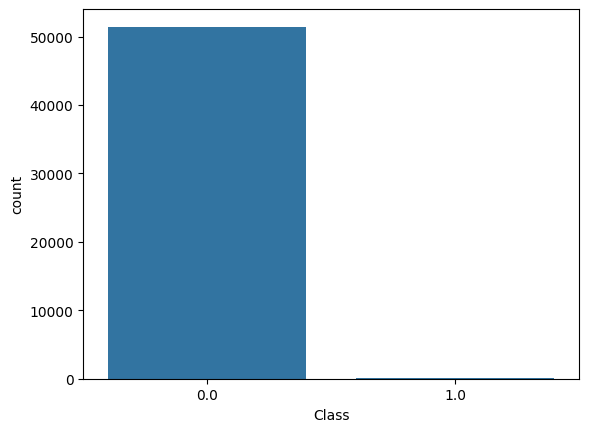

In [199]:
#Tracé de la repartition
sns.countplot(x='Class', data= df)

La solution au désequilibre est de faire un échantillonage c'est à dire prendre le meme nombre de cas de fraude et de non fraude. Cela nous permettra d'avoir une meilleure prediction et surtout ne pas avoir un sous-apprentissage de notre modèle

In [200]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [201]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [202]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [203]:
# Normalisation des variables Temps et Amount avec RobustScaler
from sklearn.preprocessing import RobustScaler
normalise = RobustScaler()
df['new_time']= normalise.fit_transform(df['Time'].values.reshape(-1,1))
df['new_amount']= normalise.fit_transform(df['Amount'].values.reshape(-1,1))

# Nous allons ensuite remplacer les anciennes valeurs de Time et Amount par les nouvelles valeurs
df.drop(['Time','Amount'],axis=1, inplace=True)
new_time= df['new_time']
new_amount= df['new_amount']

df.drop(['new_time','new_amount'],axis=1, inplace=True)

df.insert(0,'new_time', new_time)
df.insert(1,'new_amount', new_amount)


In [204]:
df.head()

,new_time,new_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-2.004869,1.583524,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-2.004869,-0.288672,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-2.004809,4.501975,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-2.004809,1.250701,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-2.004750,0.568871,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [205]:
# Nous allons separer les donées en 2 parties afin d'avoir la meme quantité de fraude et de non fraude
df = df.sample(frac=1)

df_fraude =df.loc[df['Class']== 1] #Ici nous aurons un dataframe contenant uniquement les fraudes
df_non_fraude = df.loc[df['Class']== 0][:222] # dataframe contenant 222 cas de non fraude

#nouveau dataframe contenant le meme nombre de fraude et non fraude
new_df =pd.concat([df_fraude,df_non_fraude])
new_df= new_df.sample(frac=1,random_state=42)

new_df.head()

,new_time,new_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
13370,-0.602761,-0.195655,-0.838620,1.189559,0.710331,-0.020132,2.819037,3.879484,0.396680,0.221729,...,0.211442,-0.396211,-0.967846,-0.281362,0.901252,0.164360,-0.579402,-0.938479,-0.369225,0.0
8615,-1.314413,-0.310206,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,...,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.0
27627,0.051477,-0.081358,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,...,0.329342,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1.0
1757,-1.924358,1.959926,0.817890,-1.103149,0.777374,0.158437,-1.080194,0.626879,-0.703740,0.392162,...,0.174785,-0.088037,-0.445074,-0.077474,-0.248966,-0.030307,0.961000,-0.062414,0.024361,0.0
42635,0.440196,-0.177943,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,...,0.723314,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,1.0


<Axes: xlabel='Class', ylabel='count'>

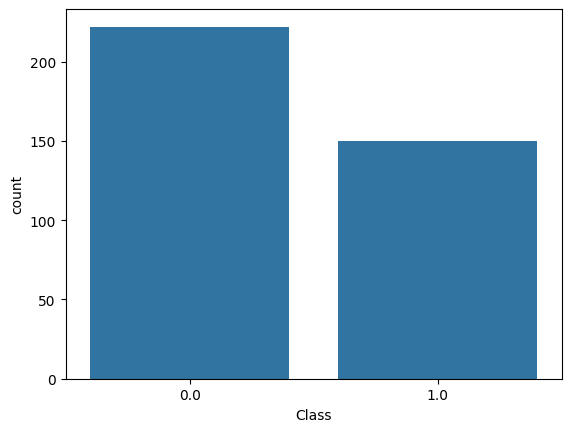

In [206]:
# Tracé de la repartition
sns.countplot(x='Class', data= new_df)

Matrice de correlation



<Axes: >

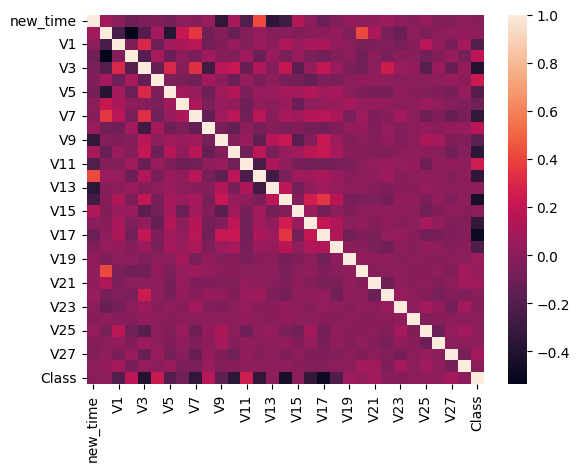

In [207]:
# Tracé avant échantillonage
mat_cor = df.corr()
sns.heatmap(mat_cor)

<Axes: >

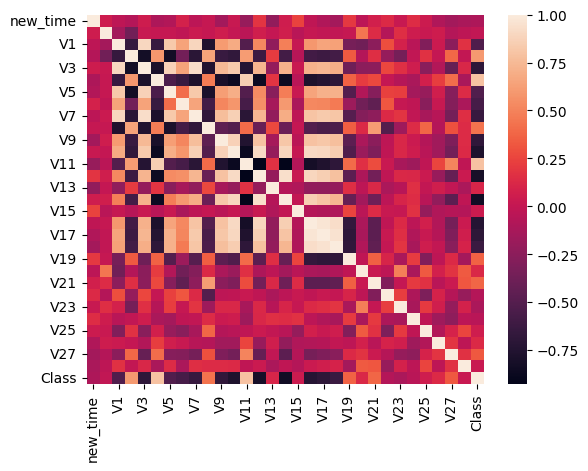

In [208]:
mat_cor_new = new_df.corr()
sns.heatmap(mat_cor_new)

Boites à moustaches

Text(0.5, 1.0, 'V17')

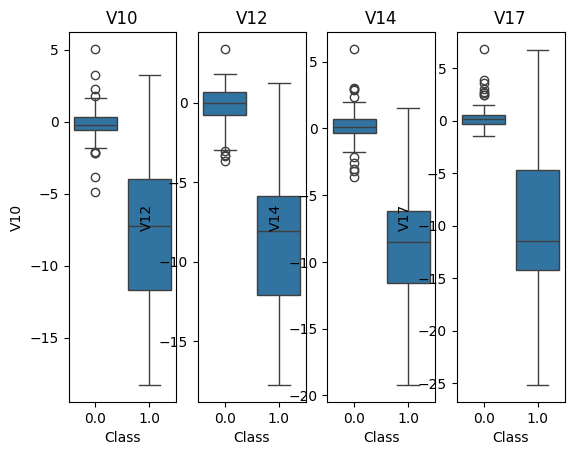

In [209]:
# Après avoir fait la matrice de correlation nous avons remarqué que les variables V2, V4, V10, v11, V12, V14, V17 et V19 avait une grande influence sur la Class
tr,axe = plt.subplots(ncols=4)
sns.boxplot(x="Class", y="V10", data= new_df, ax=axe[0])
axe[0].set_title('V10')

sns.boxplot(x="Class", y="V12", data= new_df, ax=axe[1])
axe[1].set_title('V12')

sns.boxplot(x="Class", y="V14", data= new_df, ax=axe[2])
axe[2].set_title('V14')

sns.boxplot(x="Class", y="V17", data= new_df, ax=axe[3])
axe[3].set_title('V17')

Text(0.5, 1.0, 'V19')

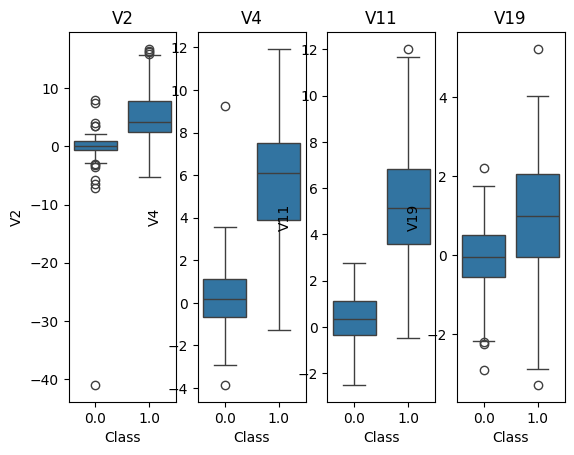

In [210]:
tr,axe = plt.subplots(ncols=4)
sns.boxplot(x="Class", y="V2", data= new_df, ax=axe[0])
axe[0].set_title('V2')

sns.boxplot(x="Class", y="V4", data= new_df, ax=axe[1])
axe[1].set_title('V4')

sns.boxplot(x="Class", y="V11", data= new_df, ax=axe[2])
axe[2].set_title('V11')

sns.boxplot(x="Class", y="V19", data= new_df, ax=axe[3])
axe[3].set_title('V19')

Avec les tracés des boites à moustaches, nous remarquons la présence de valeurs abérantes. Pour pallier ce problème, nous avons utiliser les quartiles

In [211]:
v10 = new_df['V10'].loc[new_df['Class']==1].values
Q1,Q3= np.percentile(v10, 25), np.percentile(v10,75)
IQR_10 = Q1-Q3
v10_cut_off = IQR_10 * 1,5
v10_moins = Q1- v10_cut_off
v10_plus = Q3 + v10_cut_off
print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR =',IQR_10)
print('cut_off', v10_cut_off)
print('v10_moins',v10_moins)
print('v10_plus',v10_plus)

Q1 = -11.692743574363401
Q3 = -4.0017902062286925
IQR = -7.690953368134709
cut_off (-7.690953368134709, 5)
v10_moins [ -4.00179021 -16.69274357]
v10_plus [-11.69274357   0.99820979]


J'ai eu du mal avec les valeurs aberrantes

Entrainement du modèle

In [212]:
# Nous allons tout d'abord prendre notre dataframe sans la colonne Class
X= new_df.drop('Class',axis=1)
# Puis nous allons mettre la colonne Class dans une variable y
Y=new_df['Class']

# Division de la base en 2 parties : données d'entrainement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

print('X_train = ',X_train)
print('X_test = ',X_test)
print('Y_train = ',Y_train)
print('X_test = ',X_test)

X_train =  [[-0.24960665 -0.19552752  0.14454968 ... -0.10748254  0.127768
   0.25260434]
 [-0.23084459 -0.09397299  1.33721302 ...  0.58398662 -0.07358693
  -0.00652632]
 [-1.26905151  1.96629715 -4.06400474 ... -0.40986274 -3.03627133
  -0.6306052 ]
 ...
 [-1.59008461  0.42883537 -4.39797444 ... -0.65748775 -0.82713571
   0.84957338]
 [ 0.22959774  0.16392712  1.20090869 ... -0.83854566  0.04873961
   0.02748599]
 [ 0.66664688 -0.21209225 -1.80272414 ...  0.01832081 -0.32855646
  -0.19684546]]
X_test =  [[ 7.57607244e-02 -1.70043323e-01 -7.93404995e-01 ... -3.52421589e-01
   8.27676061e-02  5.63968661e-02]
 [-1.51349265e+00  1.03000765e+00 -1.79540738e+00 ... -2.64166973e-02
   2.91908546e-01  3.00954386e-01]
 [-3.27148582e-01 -3.06511213e-01  1.27402403e+00 ...  1.72696138e-01
  -6.67072584e-04  2.10842999e-02]
 ...
 [ 6.30903963e-01 -3.10206422e-01 -4.61746103e+00 ... -2.39996240e-01
  -1.83463054e-01 -7.33597032e-02]
 [-1.81837613e+00 -3.10206422e-01 -4.21929480e-01 ... -8.0347979

In [220]:
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [214]:
Classification = {"Arbre_decision": DecisionTreeClassifier(),
                  "K_Voisin": KNeighborsClassifier(),
                  "Support_Vecteur ": SVC(),
                  "RegressionLogistique": LogisticRegression()
                  }


In [215]:
for key, classif in Classification.items() :
    classif.fit(X_train, Y_train)
    score_train = cross_val_score(classif, X_train, Y_train, cv=5)
    print(classif.__class__.__name__,"=", round(score_train.mean(), 2) * 100, "% ")


DecisionTreeClassifier = 94.0 % 
KNeighborsClassifier = 96.0 % 
SVC = 96.0 % 
LogisticRegression = 96.0 % 


Amelioration du modèle

In [221]:
from sklearn.model_selection import GridSearchCV

## Paramètre pour la regression logistique
param_reg= {"penalty": ['11','12'],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_reg = GridSearchCV(LogisticRegression(),param_reg)
grid_reg.fit(X_train, Y_train)
reg = grid_reg.best_estimator_

ValueError: 
All the 70 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'none' (deprecated), 'l2', 'l1', 'elasticnet'} or None. Got '11' instead.

--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'none' (deprecated), 'l2', 'l1', 'elasticnet'} or None. Got '12' instead.
